# CSCI-B365 Semester Project 
#### Dohyun Kim, Kaehyun Um
###### Datasets
*   Spaceship Titanic: Predict which passengers are transported to an alternate dimension
*   House Prices: Predict Sales prices




In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **1. Problem and Data Description**



####1-1. Spaceship Titanic

This problem assumes that a spacecraft, named Titanic, carrying passengers has a problem while sailing in the very distant future. With this data set, we need to figure out which passengers were transported by the anomaly.





**Read data : train.csv**

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target

####1-2. House Prices

The problem with this data is predicting the sales price of each house. You can predict the value of the SalePrice for each ID. This data contains many things that homebuyers are curious about. For example, the quality and area of the garage were built in what year.

**Read data: train.csv**

*   SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
*   LotArea: Lot size in square feet
*   OverallCond: Overall condition rating
*   YearBuilt: Original construction date
*   YearRemodAdd: Remodel date
*   ExterCond: Present condition of the material on the exterior
*   BsmtCond: General condition of the basement
*   HeatingQC: Heating quality and condition
*   1stFlrSF: First Floor square feet
*   2ndFlrSF: Second floor square feet
*   GarageCond: Garage condition













### **2. Data Processing & Exploratory Data Analysis**
#### 2-1. Spaceship Titanic

- Predict  which  passengers  are  transported  to  an 
alternate dimension. 

**Handling the missing values**

We will just drop the missing values of HomePlanet, CryoSleep,Cabin, Destination, VIP, and Name to 0. Because if there is no value, it means that this data is not important for analysis. But for Age, RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck, we would replace missing values with the average of each variables.

In [7]:
titanic_train = pd.read_csv("/content/gdrive/My Drive/SemesterProject_data/titanic/train.csv")
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
titanic_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# 얘네는 안 써있으면 버리는게 맞는걸로 판단
titanic_train = titanic_train.dropna(subset=['HomePlanet'])
titanic_train = titanic_train.dropna(subset=['CryoSleep'])
titanic_train = titanic_train.dropna(subset=['Cabin'])
titanic_train = titanic_train.dropna(subset=['Destination'])
titanic_train = titanic_train.dropna(subset=['VIP'])
titanic_train = titanic_train.dropna(subset=['Name'])

In [10]:
#얘네는 가격과 관련된 애들이라서 일단 평균으로 채워버리기
titanic_train.Age = titanic_train.Age.fillna(round(titanic_train['Age'].mean(),2))
titanic_train.RoomService = titanic_train.RoomService.fillna(round(titanic_train['RoomService'].mean(),2))
titanic_train.ShoppingMall = titanic_train.ShoppingMall.fillna(round(titanic_train['ShoppingMall'].mean(),2))
titanic_train.FoodCourt = titanic_train.FoodCourt.fillna(round(titanic_train['FoodCourt'].mean(),2))
titanic_train.Spa = titanic_train.Spa.fillna(round(titanic_train['Spa'].mean(),2))
titanic_train.VRDeck = titanic_train.VRDeck.fillna(round(titanic_train['VRDeck'].mean(),2))

In [11]:
titanic_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

**Exploratory Data Analysis**  
　　(1) Overview the data


In [12]:
titanic_train.describe()[1:].T.style.background_gradient(cmap= "Pastel2", axis=None, vmin=0, vmax=120, high=0.5, text_color_threshold=0)\
                        .bar(subset=["mean"], color="lightpink", vmin=0)\
                        .bar(subset=["std"], color="lightpink", vmin=0)\
                        .bar(subset=["max"], color="lightpink", vmin=0)\

,mean,std,min,25%,50%,75%,max
Age,28.846256,14.333877,0.000000,20.000000,27.000000,37.000000,79.000000
RoomService,221.319026,631.582409,0.000000,0.000000,0.000000,80.000000,9920.000000
FoodCourt,464.970397,1626.530777,0.000000,0.000000,0.000000,122.000000,29813.000000
ShoppingMall,177.069542,561.472743,0.000000,0.000000,0.000000,47.000000,12253.000000
Spa,308.882566,1117.335508,0.000000,0.000000,0.000000,92.000000,22408.000000
VRDeck,305.237307,1116.902993,0.000000,0.000000,0.000000,74.500000,20336.000000


In [13]:
titanic_train.describe(include=['O']).T.style.background_gradient()\
                .bar(subset=["count"], color="lightpink", vmin=7559, vmax=titanic_train.shape[0])\
                .bar(subset=["unique"], color="lightpink")

,count,unique,top,freq
PassengerId,7559,7559,0001_01,1
HomePlanet,7559,3,Earth,4101
CryoSleep,7559,2,False,4854
Cabin,7559,5957,G/734/S,8
Destination,7559,3,TRAPPIST-1e,5253
VIP,7559,2,False,7379
Name,7559,7540,Glena Hahnstonsen,2


　　(2) Explore Categorical Data 

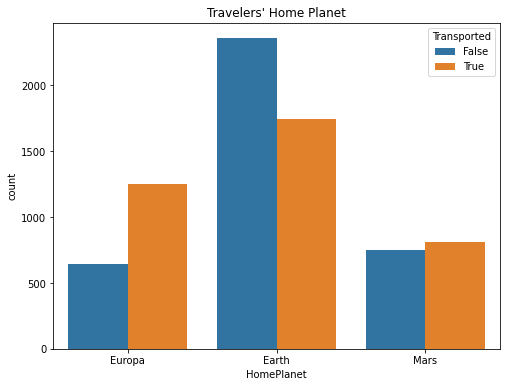

In [14]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = titanic_train, x = 'HomePlanet', hue="Transported")
plt.title("Travelers' Home Planet")
plt.show()

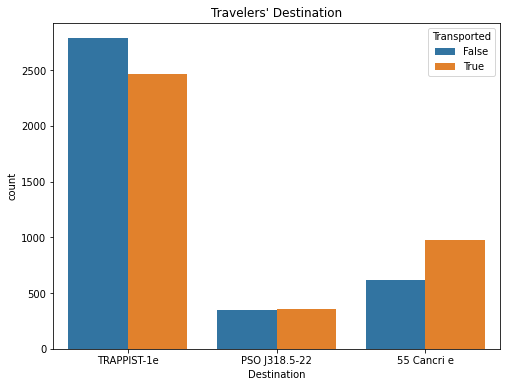

In [15]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = titanic_train, x = 'Destination', hue="Transported")
plt.title("Travelers' Destination")
plt.show()

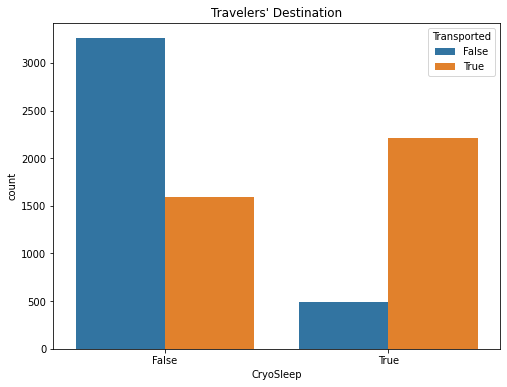

In [16]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = titanic_train, x = 'CryoSleep', hue="Transported")
plt.title("Travelers' Destination")
plt.show()

　　(3) Explore Continuous Data 

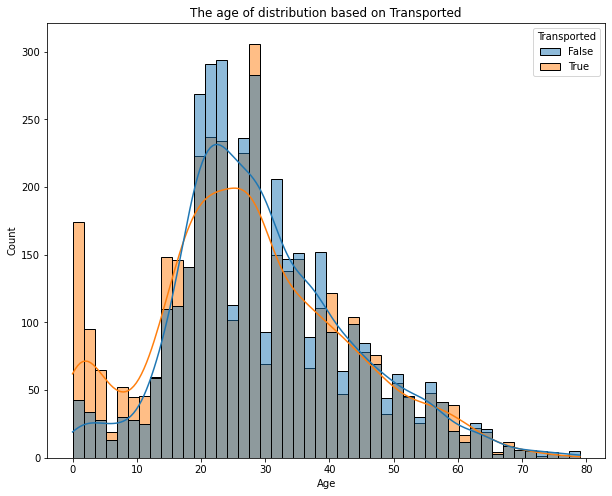

In [17]:
plt.figure(figsize = (10,8))
sns.histplot(data = titanic_train, x = 'Age',hue="Transported",kde=True)
plt.title("The age of distribution based on Transported")
plt.show()

　　(4) Check the correlation between columns

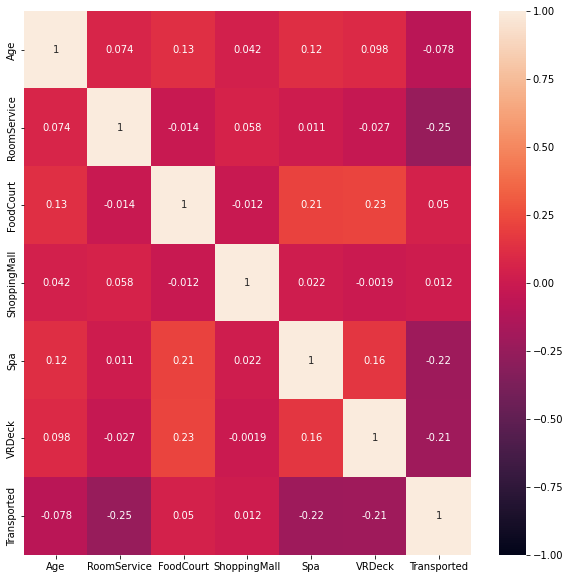

In [18]:
fig = plt.figure(figsize=(10., 10.))
ax = sns.heatmap(titanic_train.corr(), vmin=-1., vmax=1., annot=True)

#### 2-2. House Prices
**Read data: train.csv**

In [19]:
house_train = pd.read_csv("/content/gdrive/My Drive/SemesterProject_data/houseprice/train.csv")
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Handling the missing values**

We will just drop every NA data because most of the data is categorical data.

In [20]:
house_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

There are 81 columns in the data. And we found that there are so many NaN value which is unnecessary while we explore the data. So we decided to drop the value which has so many NaN value. 

In [21]:
clean = house_train[[column for column in house_train if house_train[column].count() / len(house_train) >= 0.5]]

print("List of dropped columns:", end=" ")
for c in house_train.columns:
    if c not in clean.columns:
        print(c, end=", ")
print('\n')
house_train = clean

house_train.head()

List of dropped columns: Alley, PoolQC, Fence, MiscFeature, 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Exploratory Data Analysis**

(1) Overview the data

In [22]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Since there are still too many columns, we select 11 columns that can represent this dataset.

In [23]:
house_select = house_train[['SalePrice','LotArea','OverallCond','YearBuilt','YearRemodAdd','HeatingQC','1stFlrSF','2ndFlrSF','GarageCond','BsmtCond','ExterCond']]

house_select.head()

,SalePrice,LotArea,OverallCond,YearBuilt,YearRemodAdd,HeatingQC,1stFlrSF,2ndFlrSF,GarageCond,BsmtCond,ExterCond
0,208500,8450,5,2003,2003,Ex,856,854,TA,TA,TA
1,181500,9600,8,1976,1976,Ex,1262,0,TA,TA,TA
2,223500,11250,5,2001,2002,Ex,920,866,TA,TA,TA
3,140000,9550,5,1915,1970,Gd,961,756,TA,Gd,TA
4,250000,14260,5,2000,2000,Ex,1145,1053,TA,TA,TA


In [24]:
house_select.describe()[1:].T.style.background_gradient(cmap= "Pastel2", axis=None, vmin=0, vmax=7500, high=0.5, text_color_threshold=0)\
                       .bar(subset=["mean"], color="peachpuff", vmin=0)\
                       .bar(subset=["std"], color="peachpuff", vmin=0)\
                       .bar(subset=["max"], color="peachpuff", vmin=0)                  

,mean,std,min,25%,50%,75%,max
SalePrice,180921.195890,79442.502883,34900.000000,129975.000000,163000.000000,214000.000000,755000.000000
LotArea,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallCond,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
1stFlrSF,1162.626712,386.587738,334.000000,882.000000,1087.000000,1391.250000,4692.000000
2ndFlrSF,346.992466,436.528436,0.000000,0.000000,0.000000,728.000000,2065.000000


　　(2) Explore Categorical Data 

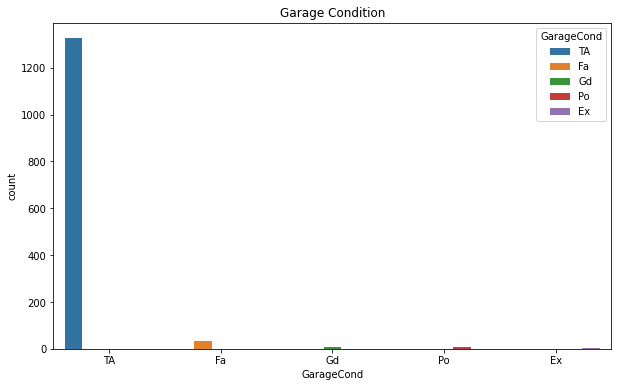

In [25]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = house_select, x = 'GarageCond', hue="GarageCond")
plt.title("Garage Condition")
plt.show()

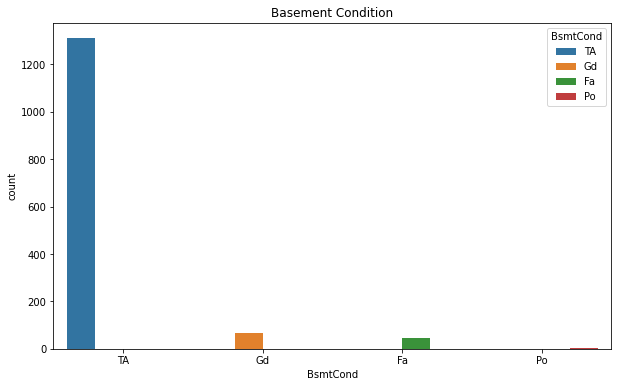

In [26]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(data = house_select, x = 'BsmtCond', hue="BsmtCond")
plt.title("Basement Condition")
plt.show()

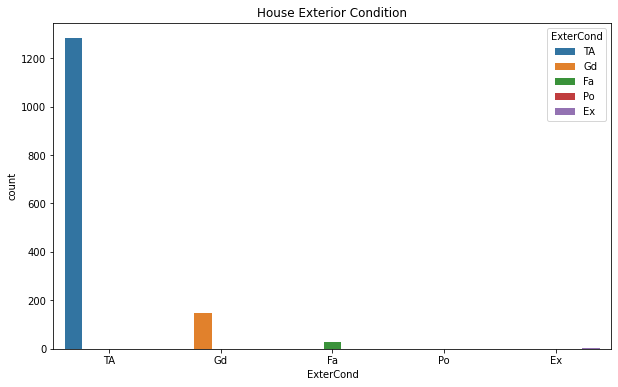

In [27]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(data = house_select, x = 'ExterCond', hue="ExterCond")
plt.title("House Exterior Condition")
plt.show()

　　(3) Explore Continuous Data 

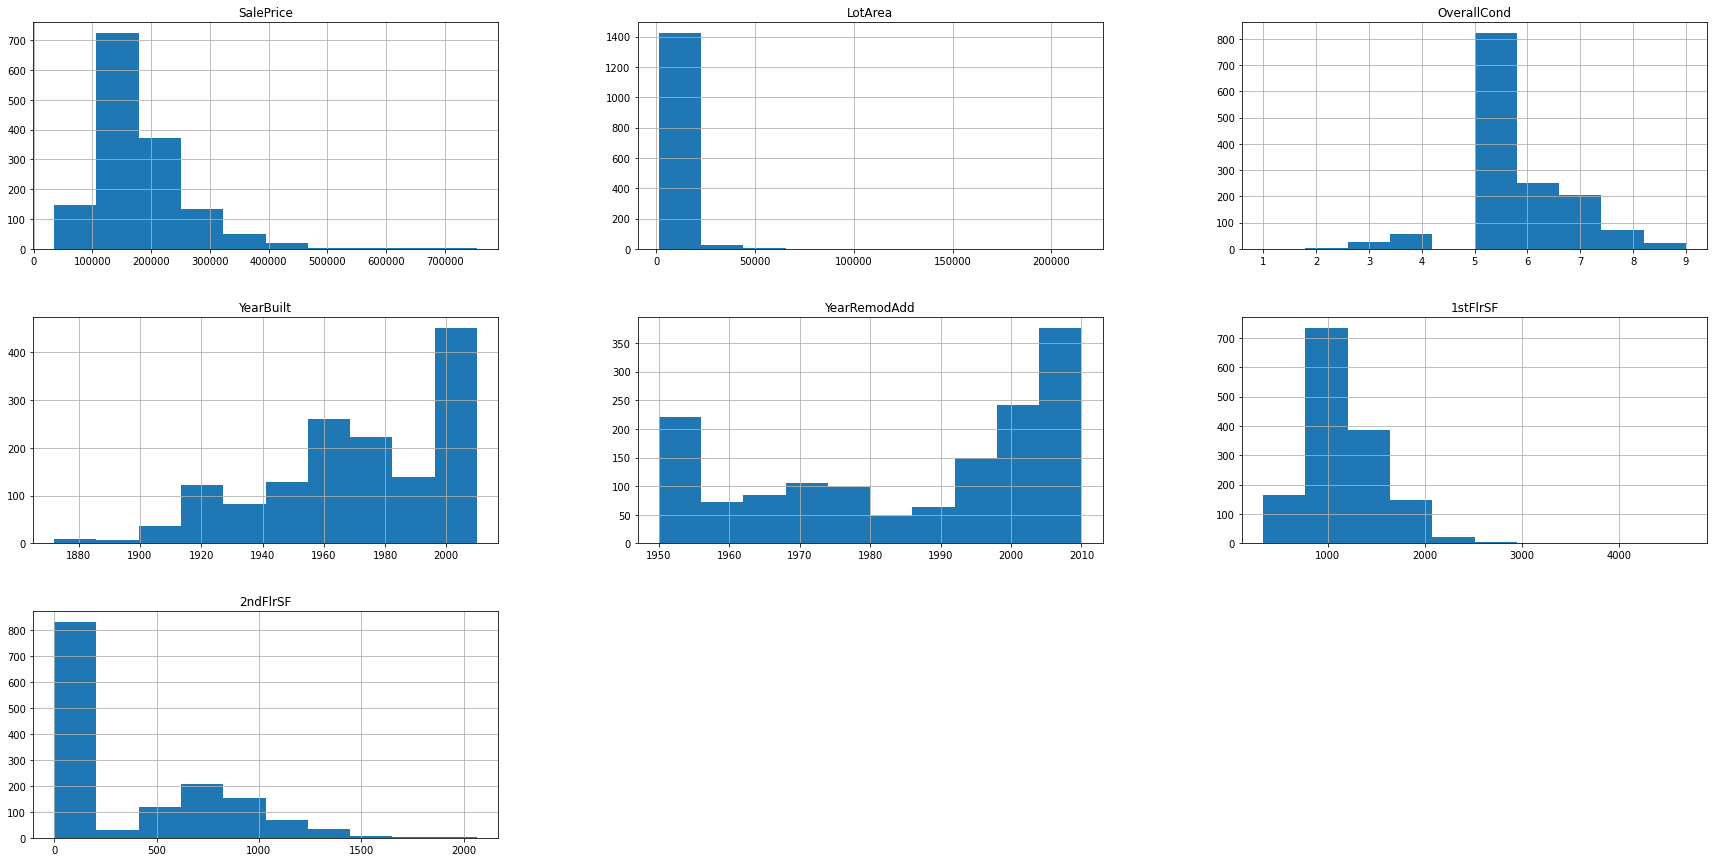

In [28]:
house_select.hist(bins=10, figsize=(30,15))
plt.show()

　　(4) Check the correlation between columns

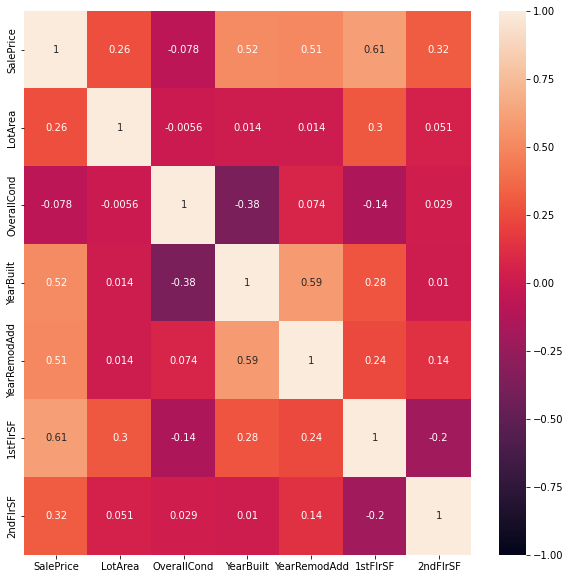

In [29]:
fig = plt.figure(figsize=(10., 10.))
ax = sns.heatmap(house_select.corr(), vmin=-1., vmax=1., annot=True)

### **3. Algorithm and Methodology**

**Import modules**

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from IPython.display import clear_output

### 3-1. Spaceship Titanic
####**Preprocess the data**

In [31]:
t_train = pd.read_csv("/content/gdrive/My Drive/SemesterProject_data/titanic/train.csv")
t_test = pd.read_csv("/content/gdrive/My Drive/SemesterProject_data/titanic/test.csv")

In [32]:
test_passengerIds = t_test['PassengerId']
test_passengerIds.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [33]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='median')
imputer.fit(t_train[imputer_cols])
t_train[imputer_cols] = imputer.transform(t_train[imputer_cols])
t_train["HomePlanet"].fillna(t_train['HomePlanet'].mode()[0], inplace=True)

t_test[imputer_cols] = imputer.transform(t_test[imputer_cols])
t_test["HomePlanet"].fillna(t_test["HomePlanet"].mode()[0], inplace=True)

In [34]:
t_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [35]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(predict_titanic_train,titanic_test, columns):
    for col in columns:
        predict_titanic_train[col] = predict_titanic_train[col].astype(str)
        titanic_test[col] = titanic_test[col].astype(str)
        predict_titanic_train[col] = LabelEncoder().fit_transform(predict_titanic_train[col])
        titanic_test[col] = LabelEncoder().fit_transform(titanic_test[col])
    return predict_titanic_train, titanic_test

predict_titanic_train ,titanic_test = label_encoder(t_train,t_test,label_cols)

In [36]:
t_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
predict_titanic_train.drop(["Name"] , axis = 1 ,inplace = True)
titanic_test.drop(["Name"] , axis = 1 ,inplace = True)

X = predict_titanic_train.drop("Transported" , axis =1 )
y = predict_titanic_train["Transported"]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, test_size =0.2,
                                                       random_state = 40)

####**Models**

1. **KNN**


In [44]:
parameters = {'n_neighbors': [3, 4, 5, 6, 7, 9, 11],
            'p': [1, 2],
            'metric': ['euclidean', 'minkowski']}

knn_model = KNeighborsClassifier()
gs = GridSearchCV(knn_model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs= -1)
gs.fit(X_train, y_train)

print('Best Parameters : ',gs.best_params_)
print()
print('Best Accuracy : ' + str(round(gs.best_score_,2)*100) + "%")

Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1}

Best Accuracy : 68.0%


2. **Gaussian Naive Bayes**

In [43]:
param_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

NB = GaussianNB()
gs = GridSearchCV(estimator = NB, param_grid = param_grid, scoring='accuracy', cv = 5, n_jobs=-1 )
gs.fit(X_train, y_train)
print('Best Parameters : ', gs.best_params_)
print()
print('Best Accuracy : ' + str(round(gs.best_score_,2)*100) + "%")

Best Parameters :  {'var_smoothing': 1e-10}

Best Accuracy : 70.0%


3. **Logistic Regression**

In [42]:
lr_model= LogisticRegression()
param_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

gs = gs = GridSearchCV(estimator = lr_model, param_grid = param_grid, scoring='accuracy', cv = 5, n_jobs=-1 )
start_time = time.time()
gs.fit(X_train, y_train)
run_time = time.time() - start_time

print('Best Parameters : ', gs.best_params_)
print()
print('Best Accuracy : ', str(round(gs.best_score_,2)*100) + "%")
print(f"Run Time: {run_time:.2f}s")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best Parameters :  {'C': 0.25, 'max_iter': 150, 'penalty': 'l2'}

Best Accuracy :  78.0%
Run Time: 7.48s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


4. **Using RandomForest - Ensemble Method ( Bagging )**

In [45]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 12],
    "min_samples_leaf" : [18, 19, 20],
    "min_samples_split" : [8, 9, 10]
}

RFC_Model = RandomForestClassifier()
gs = GridSearchCV(RFC_Model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs= -1)

start_time = time.time()
gs.fit(X_train, y_train)
run_time = time.time() - start_time

print('Best Parameters : ', gs.best_params_)
print()
print('Best Accuracy : ', str(round(gs.best_score_,2)*100) + "%")
print(f"Run Time: {run_time:.2f}s")

Best Parameters :  {'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 20}

Best Accuracy :  78.0%
Run Time: 89.09s


5. **XGB Boost - Ensemble Method ( Boosting )**

In [40]:
param_grid = {'n_estimators': [10, 25, 50, 75, 100],
              'learning_rate': [0.2, 0.15, 0.1, 0.05],
              'eval_metric': ['mlogloss']}

gs = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
start_time = time.time()
gs.fit(X_train, y_train)
run_time = time.time() - start_time


print('Best parameters:', gs.best_params_)
print()
print('Best Accuracy : ', str(round(gs.best_score_,2)*100) + "%")
print(f"Run Time: {run_time:.2f}s")

Best parameters: {'eval_metric': 'mlogloss', 'learning_rate': 0.15, 'n_estimators': 10}

Best Accuracy :  77.0%
Run Time: 19.71s


6. **LightGBM: 5-folds - Ensemble Method ( Boostng )**

In [38]:
from sklearn import preprocessing 
lbl = preprocessing.LabelEncoder() 
predict_titanic_train['PassengerId'] = lbl.fit_transform(predict_titanic_train['PassengerId'].astype(str))
titanic_test['PassengerId'] = lbl.fit_transform(titanic_test['PassengerId'].astype(str))

In [39]:
lgb_params = {
    'objective' : 'binary',
    'n_estimators' :50,
    'learning_rate' : 0.08
}

lgb_predictions = 0
lgb_scores = []
lgb_fimp = []

LGBM_FEATURES = list(predict_titanic_train.columns)[:-1]
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=12)
for fold, (train_idx, valid_idx) in enumerate(skf.split(predict_titanic_train[LGBM_FEATURES], predict_titanic_train["Transported"])):
    print(f'\033[94m')
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_test = predict_titanic_train.iloc[train_idx][LGBM_FEATURES], predict_titanic_train.iloc[valid_idx][LGBM_FEATURES]
    y_train , y_test = predict_titanic_train["Transported"].iloc[train_idx] , predict_titanic_train["Transported"].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_test)
    acc = accuracy_score(y_test,  preds_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    
    fim = pd.DataFrame(index=LGBM_FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    
    print(f"Fold={fold+1}, Accuracy score: {acc:.3f}%, Run Time: {run_time:.2f}s")
    test_preds = model.predict(titanic_test[LGBM_FEATURES]) 
    lgb_predictions += test_preds/5
print("")
print("Mean Accuracy :", str(round(np.mean(lgb_scores),2)*100) + "%")


========== Fold=1 ==========
Fold=1, Accuracy score: 0.821%, Run Time: 0.17s

========== Fold=2 ==========
Fold=2, Accuracy score: 0.788%, Run Time: 0.16s

========== Fold=3 ==========
Fold=3, Accuracy score: 0.797%, Run Time: 0.36s

========== Fold=4 ==========
Fold=4, Accuracy score: 0.804%, Run Time: 0.16s

========== Fold=5 ==========
Fold=5, Accuracy score: 0.807%, Run Time: 0.18s

Mean Accuracy : 80.0%




> **Summary**  
Out of the six models, LGBM model was the most accurate with 80%. Therefore, based on this model, the predicted data frame is formed as "titanic_result" to store the predicted values.




In [46]:
titanic_result = pd.DataFrame(index=range(0,len(lgb_predictions)), columns=['PassengerId', 'Transported'])

In [47]:
titanic_result["PassengerId"] = test_passengerIds
titanic_result["Transported"] = lgb_predictions.astype("bool")
titanic_result.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


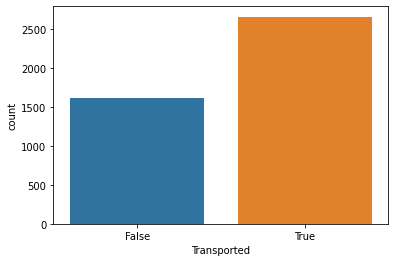

In [48]:
sns.countplot(x='Transported', data=titanic_result)

In [49]:
transport = titanic_result[titanic_result["Transported"] == True].count()
true_transport = transport / len(titanic_result) *100
print(round(true_transport,2))

PassengerId    62.17
Transported    62.17
dtype: float64


### 3-2. House Prices
####**Preprocess the data**

In [50]:
h_train = pd.read_csv("/content/gdrive/My Drive/SemesterProject_data/houseprice/train.csv")
h_test = pd.read_csv("/content/gdrive/My Drive/SemesterProject_data/houseprice/test.csv")

In [51]:
y = h_train[['Id', 'SalePrice']]
h_train = h_train.drop("SalePrice", axis=1)

In [52]:
dfs = [h_train, h_test]
house_df = pd.concat(dfs).reset_index(drop = True)

house_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'], axis =1, inplace = True)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [53]:
imputer_cols = ["LotFrontage", "GarageYrBlt", "BsmtFullBath", "TotalBsmtSF", "GarageCars" ,"GarageArea"]
imputer = SimpleImputer(strategy='median' )
imputer.fit(house_df[imputer_cols])
house_df[imputer_cols] = imputer.transform(house_df[imputer_cols])

house_df['MasVnrType'].fillna(value='None',inplace=True)
house_df['MasVnrArea'].fillna(0,inplace=True)
house_df['BsmtCond'].fillna(value='TA',inplace=True)
house_df['BsmtExposure'].fillna(value='No',inplace=True)
house_df['Electrical'].fillna(value='SBrkr',inplace=True)
house_df['BsmtFinType2'].fillna(value='Unf',inplace=True)
house_df['GarageType'].fillna(value='Attchd',inplace=True)
house_df['GarageFinish'].fillna(value='Unf',inplace=True)
house_df['GarageQual'].fillna(value='TA',inplace=True)
house_df['GarageCond'].fillna(value='TA',inplace=True)
house_df['BsmtFinType1'].fillna(value='NO',inplace=True)
house_df['BsmtQual'].fillna(value='No',inplace=True)
house_df['BsmtFinSF2'].fillna(value=0,inplace=True)
house_df['BsmtUnfSF'].fillna(value=0,inplace=True)

In [54]:
house_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

In [55]:
labelencoder=LabelEncoder()

str_label = ['MSZoning', "Exterior1st","Exterior2nd", "KitchenQual" ,"Functional", "SaleType"]
label_cols = ["Street", "LotShape","LandContour", "LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
              "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
              "Heating","HeatingQC", "CentralAir", "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleCondition"]

for col in str_label:
  house_df[col] = labelencoder.fit_transform(house_df[col].astype(str))

for col in label_cols:
  house_df[col] = labelencoder.fit_transform(house_df[col])

In [56]:
from sklearn.preprocessing import StandardScaler
Scaler  = StandardScaler()

all_scaled   = pd.DataFrame(Scaler.fit_transform(house_df))
train_scaled = pd.DataFrame(all_scaled[:1460])
test_scaled  = pd.DataFrame(all_scaled[1460:2920])

In [57]:
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)

1. **Linear Regression**

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Lregres = LinearRegression()
Lregres.fit(X_train, y_train)
linear_pred = Lregres.predict(X_test)

print ("Training score:",Lregres.score(X_train,y_train))
print ("Test Score:",Lregres.score(X_test,y_test))
print ("Fitness assessment:", r2_score(y_test,linear_pred))

Training score: 0.8441793062348162
Test Score: 0.849505007350301
Fitness assessment: 0.849505007350301


2. **Lasso**

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print ("Training score:",lasso.score(X_train,y_train))
print("Test Score:",lasso.score(X_test,y_test))
print ("Fitness assessment:", r2_score(y_test,lasso_pred))

Training score: 0.8441807524227121
Test Score: 0.8495734949417604
Fitness assessment: 0.8495734949417604


3. **XGBoost Regressor**

In [60]:
from xgboost import XGBRegressor

XGB = XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)
xgb_pred = XGB.predict(X_test)

print ("Training score:",XGB.score(X_train,y_train))
print("Test Score:",XGB.score(X_test,y_test))
print ("Fitness assessment:", r2_score(y_test,xgb_pred))

[21:18:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score: 0.9878463275679412
Test Score: 0.930856175748829
Fitness assessment: 0.930856175748829


4. **LightGBM Regressor**

In [61]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)
lgbm_pred = LGBM.predict(X_test)

print ("Training score:",LGBM.score(X_train,y_train))
print ("Test Score:",LGBM.score(X_test,y_test))
print ("Fitness assessment:", r2_score(y_test,lgbm_pred))

Training score: 0.9999557727264998
Test Score: 0.9101390980189892
Fitness assessment: 0.9101390980189892


**Summary**


> Of the four models, the two ensemble models showing the highest fitness score were blended by 50% each and the results were stored in the data frame.




In [62]:
xgb_predictions  = pd.DataFrame(XGB.predict(test_scaled))
lgbm_predictions = pd.DataFrame(LGBM.predict(test_scaled))

house_result=pd.DataFrame()
house_result['Id'] = h_test['Id']
house_result['SalePrice'] = 0.5 * xgb_predictions[0] + 0.5 * lgbm_predictions[0]

In [63]:
house_result.head()

,Id,SalePrice
0,1461,122240.244945
1,1462,166548.633358
2,1463,184127.731316
3,1464,188924.792859
4,1465,187145.256465


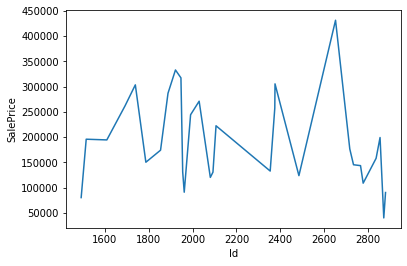

In [64]:
sns.lineplot(x='Id', y='SalePrice', data=house_result.sample(n=30, random_state=0))